In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../input/student-mental-health/Student Mental health.csv")
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [3]:
# Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [5]:
#Checking Rows and Columns
df.shape

(101, 11)

In [6]:
#Checking missing value
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [7]:
#Finding the missing value
df[df.isna().any(axis=1)]

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
43,8/7/2020 15:07,Male,NaN,BIT,year 1,0 - 1.99,No,No,No,No,No


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

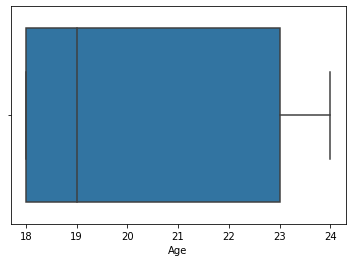

In [8]:
#Outliers detection for the Age column
sns.boxplot('Age',data = df)

In [9]:
#Replacing the missing value with mean & also the type 
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Age'] = df["Age"].astype(int)

In [10]:
df.nunique()

Timestamp                                       92
Choose your gender                               2
Age                                              7
What is your course?                            49
Your current year of Study                       7
What is your CGPA?                               6
Marital status                                   2
Do you have Depression?                          2
Do you have Anxiety?                             2
Do you have Panic attack?                        2
Did you seek any specialist for a treatment?     2
dtype: int64

In [11]:
#Removing Timestamp column as it is not necessary
df.drop(['Timestamp'], axis = 1, inplace=True)

In [12]:
#Renaming columns
df_column = {'Choose your gender':'Gender','What is your course?':'Course',
             'Your current year of Study':'Year Study','What is your CGPA?':'CGPA',
             'Do you have Depression?':'Depression', 'Marital status':'Marital',
             'Do you have Anxiety?':'Anxiety', 'Do you have Panic attack?':'Panic Attack',
             'Did you seek any specialist for a treatment?':'Treatment'}
df.rename(columns=df_column,inplace=True)
df.head()

,Gender,Age,Course,Year Study,CGPA,Marital,Depression,Anxiety,Panic Attack,Treatment
0,Female,18,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [13]:
#Giving an order to the CGPA Column
df['CGPA'].value_counts().index

Index(['3.50 - 4.00', '3.00 - 3.49', '2.50 - 2.99', '0 - 1.99', '2.00 - 2.49',
       '3.50 - 4.00 '],
      dtype='object')

In [14]:
#Lets first fix the space in 3.50-4.00
df['CGPA'] = df['CGPA'].apply(lambda x: x.strip())

In [15]:
#Order
d = {'0 - 1.99':'E', '2.00 - 2.49': 'D', '2.50 - 2.99':'C', '3.00 - 3.49':'B', '3.50 - 4.00': 'A'}

In [16]:
df['CGPA'] = df['CGPA'].apply(lambda x: d[x])
df.head()

,Gender,Age,Course,Year Study,CGPA,Marital,Depression,Anxiety,Panic Attack,Treatment
0,Female,18,Engineering,year 1,B,No,Yes,No,Yes,No
1,Male,21,Islamic education,year 2,B,No,No,Yes,No,No
2,Male,19,BIT,Year 1,B,No,Yes,Yes,Yes,No
3,Female,22,Laws,year 3,B,Yes,Yes,No,No,No
4,Male,23,Mathemathics,year 4,B,No,No,No,No,No


In [17]:
#Replacing variable Yes--1,No--0
df.replace(('Yes','No'),(1,0),inplace=True)
df.head()

,Gender,Age,Course,Year Study,CGPA,Marital,Depression,Anxiety,Panic Attack,Treatment
0,Female,18,Engineering,year 1,B,0,1,0,1,0
1,Male,21,Islamic education,year 2,B,0,0,1,0,0
2,Male,19,BIT,Year 1,B,0,1,1,1,0
3,Female,22,Laws,year 3,B,1,1,0,0,0
4,Male,23,Mathemathics,year 4,B,0,0,0,0,0


In [18]:
df.corr()

,Age,Marital,Depression,Anxiety,Panic Attack,Treatment
Age,1.000000,0.105350,-0.070418,-0.091890,0.057072,0.048315
Marital,0.105350,1.000000,0.595784,0.092606,0.275909,0.349819
Depression,-0.070418,0.595784,1.000000,0.273764,0.246842,0.345105
Anxiety,-0.091890,0.092606,0.273764,1.000000,0.084478,0.086880
Panic Attack,0.057072,0.275909,0.246842,0.084478,1.000000,0.182145
Treatment,0.048315,0.349819,0.345105,0.086880,0.182145,1.000000


<AxesSubplot:>

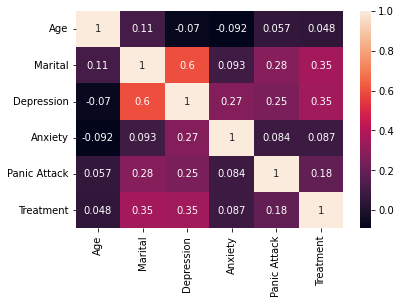

In [19]:
sns.heatmap(df.corr(),annot=True)#,vmin=-1,vmax=1) 

# Data Visualization

In [20]:
count = df['Gender'].value_counts()
count

Female    75
Male      26
Name: Gender, dtype: int64

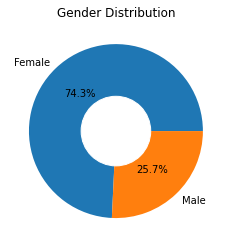

In [21]:
plt.pie(count,labels=df['Gender'].unique(),autopct="%1.1f%%")
circle = plt.Circle(xy = (0,0), radius = 0.4, color = 'white')
plt.gcf()
plt.gca().add_artist(circle)
plt.title("Gender Distribution")
plt.show()

<AxesSubplot:xlabel='Panic Attack', ylabel='count'>

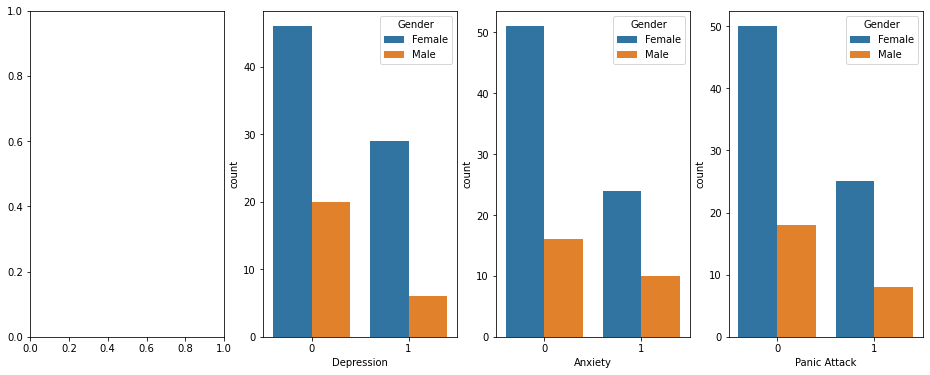

In [22]:
fig,ax = plt.subplots(1, 4, figsize=(16,6))
sns.countplot(x='Depression', hue='Gender', 
              data=df,ax=ax[1])
sns.countplot(x='Anxiety', hue='Gender', 
              data=df,ax=ax[2])
sns.countplot(x='Panic Attack', hue='Gender', 
              data=df,ax=ax[3])

In [23]:
#Observation: Female ratio is higher in all the 3 categories 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='count'>

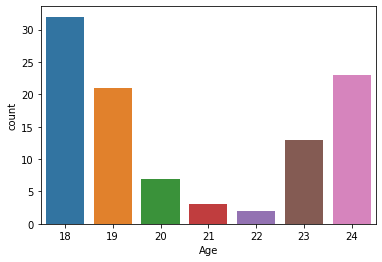

In [24]:
sns.countplot(df['Age'])

In [25]:
#Observation: Most of the students are of 18 Age

In [26]:
#Analysis on Course

In [27]:
#Finding which course has the maximum number of students affecting with panic attacks,depression & Anxiety

In [28]:
cols = ['Depression','Anxiety','Panic Attack']

In [29]:
df2 = df[cols].groupby(df['Course']).sum().reset_index()

<AxesSubplot:title={'center':'Stacked Bar Graph by dataframe'}, xlabel='Course'>

<Figure size 1080x360 with 0 Axes>

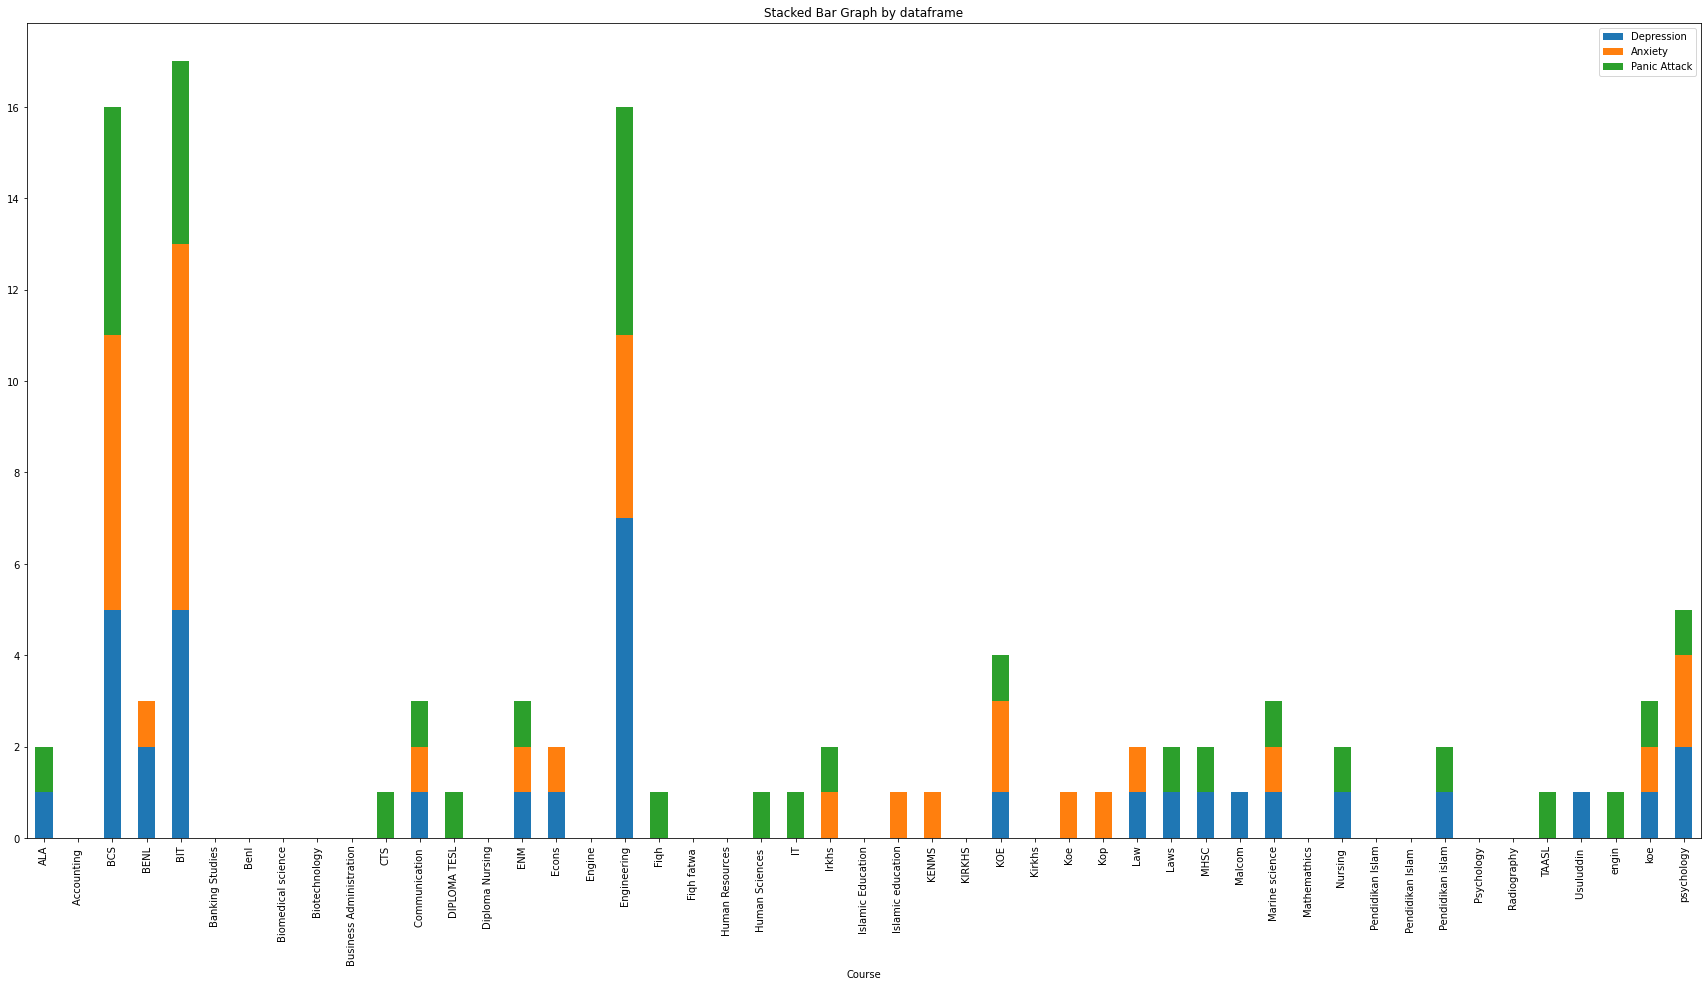

In [30]:
plt.figure(figsize = (15,5))
df2.plot(x='Course', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe',figsize=(30,15))

In [31]:
#Observation:Course name BIT has maximum students affecting with>>

In [32]:
#Obsevation:Depression:Course Engineering has highest number of students having depresion

In [33]:
#Obsevation:Depression:Course BIT has highest number of students havving anxiety.

In [34]:
#Obsevation:Depression:Course BCS & Engineering has highest number of students havving Panic Attack.

In [35]:
#Year of Study

In [36]:
df['Year Study'].value_counts()

year 1    41
Year 3    19
Year 2    16
year 2    10
year 4     8
year 3     5
Year 1     2
Name: Year Study, dtype: int64

In [37]:
df['Year Study'].replace(['year 1','year 2','year 3','year 4'],['Year 1','Year 2','Year 3','Year 4'], inplace=True)
df["Year Study"].unique()

array(['Year 1', 'Year 2', 'Year 3', 'Year 4'], dtype=object)

In [38]:
df['Year Study'].value_counts()

Year 1    43
Year 2    26
Year 3    24
Year 4     8
Name: Year Study, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Year Study', ylabel='count'>

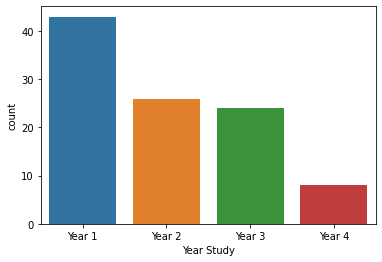

In [39]:
sns.countplot(df['Year Study'])

In [40]:
#Obesrvation: Maximum students are in 1st Year

<AxesSubplot:xlabel='Year Study', ylabel='count'>

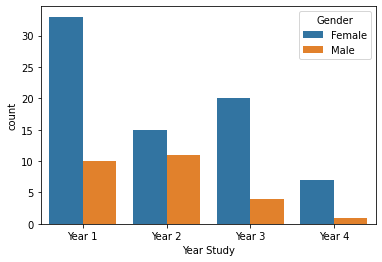

In [41]:
sns.countplot(x='Year Study',hue="Gender",data=df)

In [42]:
#CGPA 

In [43]:
df[['CGPA']].value_counts().reset_index()

,CGPA,0
0,A,48
1,B,43
2,C,4
3,E,4
4,D,2


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


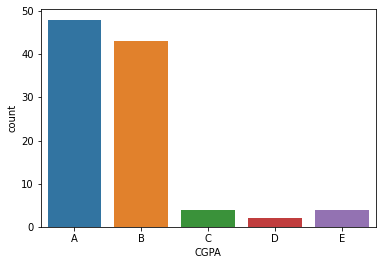

In [44]:
ax = sns.countplot(df['CGPA'].sort_values())

<AxesSubplot:xlabel='count', ylabel='Panic Attack'>

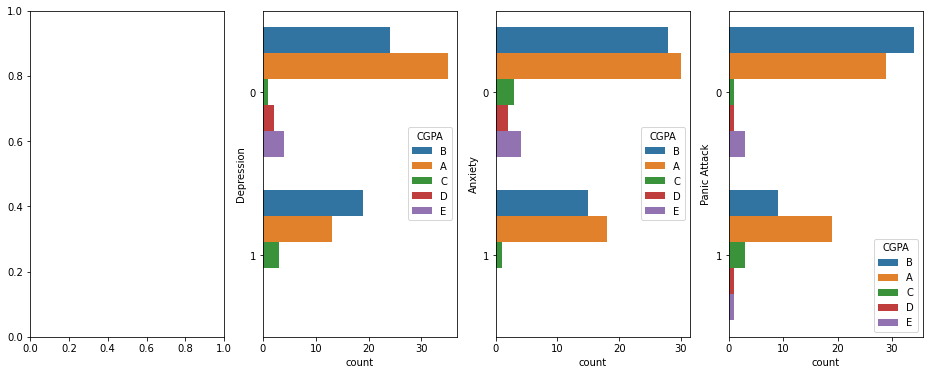

In [45]:
fig,ax = plt.subplots(1, 4, figsize=(16,6))
sns.countplot(y='Depression', hue='CGPA', 
              data=df,ax=ax[1])
sns.countplot(y='Anxiety', hue='CGPA', 
              data=df,ax=ax[2])
sns.countplot(y='Panic Attack', hue='CGPA', 
              data=df,ax=ax[3])

In [46]:
#Obeservation: Depression: Grade B students have highest number of Depresssion

In [47]:
#Obeservation: Depression: Grade A students have highest number of Anxiety & Panic Attack

In [48]:
#Marital Status

In [49]:
df['Marital'].value_counts()

0    85
1    16
Name: Marital, dtype: int64

Text(0.5, 1.0, 'Marital Status')

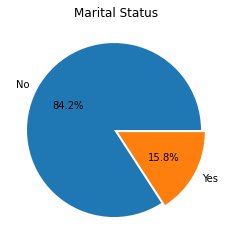

In [50]:
mylabels = ["No","Yes"]
myexplode = (0.025,0.025)
plt.pie(df['Marital'].value_counts(),autopct="%1.1f%%",labels=mylabels,explode = myexplode)
plt.title("Marital Status")

In [51]:
#Observation: Out of total students 15.8% are married.

In [52]:
#Analysis on student mental health

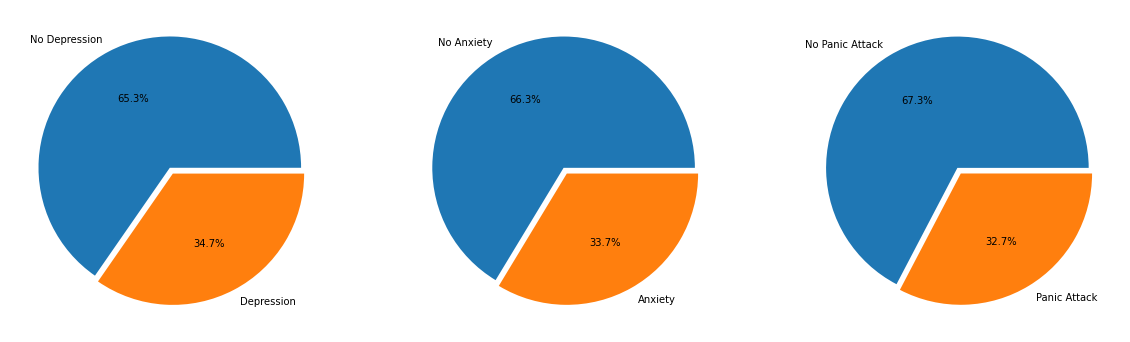

In [53]:
myexplode = (0.025,0.025)
labels1 = ["No Depression","Depression"]
labels2 = ["No Anxiety","Anxiety"]
labels3 = ["No Panic Attack","Panic Attack"]
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (20,15))
ax1.pie(df['Depression'].value_counts(),autopct="%1.1f%%",labels=labels1,explode = myexplode)
ax2.pie(df['Anxiety'].value_counts(),autopct="%1.1f%%",labels=labels2,explode = myexplode)
ax3.pie(df['Panic Attack'].value_counts(),autopct="%1.1f%%",labels=labels3,explode = myexplode)
plt.show()

In [54]:
#Students who did and didn't seek treatment

In [55]:
y = df['Treatment'].value_counts()

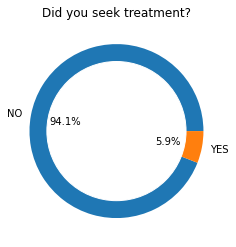

In [56]:
names = ["NO","YES"]
my_circle = plt.Circle((0, 0), 0.8, color='white')
plt.pie(y,labels=names,autopct="%1.1f%%")
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Did you seek treatment?')
plt.show()

In [57]:
#Observation: 5.9% students did seek for treatment where as a huge percentage of majority didn't